In [ ]:
import sys
import logging
import argparse
import os
import shutil
import importlib.util
import torch
import gym
import copy
import git
import re
from tensorboardX import SummaryWriter
from crowd_sim.envs.utils.robot import Robot
from crowd_nav.utils.trainer import VNRLTrainer, MPRLTrainer
from crowd_nav.utils.memory import ReplayMemory
from crowd_nav.utils.explorer import Explorer
from crowd_nav.policy.policy_factory import policy_factory

In [5]:
from crowd_nav.configs.icra_benchmark.config import BaseEnvConfig, BasePolicyConfig, BaseTrainConfig, Config


class EnvConfig(BaseEnvConfig):
    def __init__(self, debug=False):
        super(EnvConfig, self).__init__(debug)
        self.env.randomize_attributes = True
        self.env.time_step = 0.25
        self.sim.centralized_planning = False
        self.sim.test_scenario = "corner"
        self.sim.human_num = 5
        self.humans.policy = "socialforce"

env_config = EnvConfig(True)
env = gym.make('CrowdSim-v0')
env.configure(env_config)
robot = Robot(env_config, 'robot')
robot.kinematics = "holonomic"
robot.time_step = env.time_step
robot.policy = policy_factory["socialforce"]()
robot.policy.multiagent_training = True
env.set_robot(robot)

# env.set_scene("corner")

In [6]:
rewards = []
ob = env.reset()


[1, 3, 1]
Spawn group 0 of size 1, center: [-4.75430962  2.8260364 ], goal: [ 2.74569038 -4.6739636 ]
Spawn group 1 of size 3, center: [ 2.1248351  -4.18525666], goal: [-5.3751649   3.31474334]
Spawn group 2 of size 1, center: [-4.8323796   2.40905281], goal: [ 2.6676204  -5.09094719]


KeyboardInterrupt: 

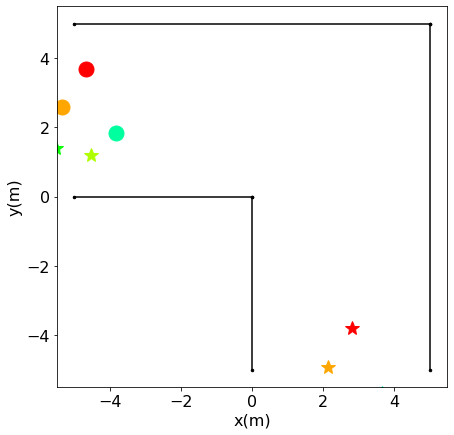

In [28]:
env.render("teleop")